### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

### Magnitudes de los factores para obtener el resultado.
Valoración de vinagre con NaOH para obtener su porcentaje de masa en volumen.


In [2]:
#datos de acidez en vinagre %en masa volumen
v_consumido = 0.01345
Cn = 0.1468
M = 60.052
alicuota = 20.00
alic1 = 100
alic2 = 15
fd= alic1/alic2 

mv=(v_consumido*Cn*M*fd/alicuota)*100
mv #resultado (concentración masa en volumen)

3.9523423973333345

Text(0.5, 1.0, 'Distribución de probabilidad del mensurando')

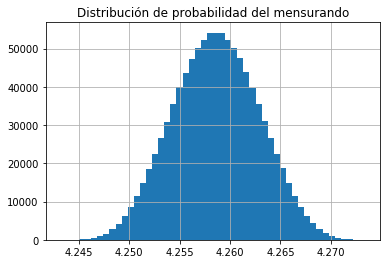

In [3]:
#Incertidumbres estándar de cada factor empleado.
########
sigma_v_consumido = 0.03
sigma_Cn = 0.0004
sigma_M = 0.001
sigma_alicuota = 0.02
sigma_fd_I = 0.04
sigma_fd_II=0.01
########

N=1000000 #cantidad de iteraciones

#Definición de los parámetros dentro de los cuales las iteraciones van a ocurrir
v_consumidoMC = v_consumido + sigma_v_consumido*np.random.triangular(0.029, 0.03, 0.031, N) #triangular(inferior, valor central, superior, iteraciones)
CnMC = Cn + sigma_Cn*np.random.normal(loc=Cn, scale=sigma_Cn, size=N)
MMC = M + sigma_M*np.random.uniform(0.0009, 0.0012, N) 
alicuotaMC = alicuota + sigma_alicuota*np.random.triangular(19,20,21,N)
alic1MC = alic1 + sigma_fd_I*np.random.triangular(99,100,101, N) 
alic2MC = alic2 + sigma_fd_II*np.random.triangular(14, 15, 16, N)


mvMC = (v_consumidoMC*CnMC*MMC*alic1MC*100/(alicuotaMC*alic2MC)) #Obtención de la incertidumbre estándar combinada.

pl.hist(mvMC,bins=50)
pl.grid()
pl.title("Distribución de probabilidad del mensurando")
#pl.xlim(0,5)


In [4]:
print(2*mvMC.std(), mvMC.mean()) #incertidumbre estándar combinada y expandida k=2, y Concentración más probable

0.008460211831802249 4.258628196358314
